<a href="https://colab.research.google.com/github/meghna-panda/ElevateLabs-task7/blob/main/t7svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [6]:
df = pd.read_csv(list(uploaded.keys())[0])

In [7]:
print(df.head())
print(df.info())
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [8]:
df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'Unnamed' in col])

In [9]:
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)


In [14]:
print("Linear Kernel SVM")
print(classification_report(y_test, y_pred_linear))


Linear Kernel SVM
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [16]:
print("RBF Kernel SVM")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel SVM
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9736263736263737


In [19]:
scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=10)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.9770989974937342


In [20]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)

svm_vis = SVC(kernel='linear', C=1)
svm_vis.fit(X_vis, y)

SVC(C=1, kernel='linear')

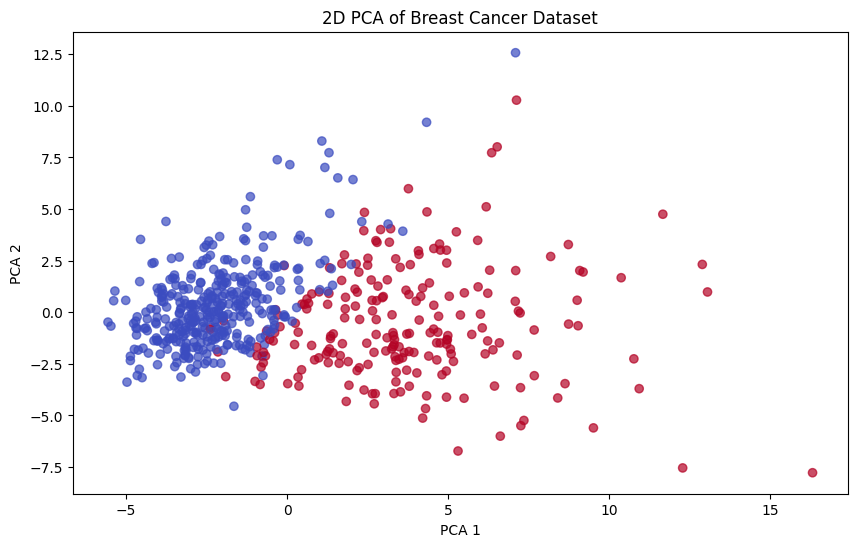

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("2D PCA of Breast Cancer Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()